In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier,RidgeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score)
from sklearn.metrics import average_precision_score
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import sys, os , warnings
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler ,MinMaxScaler,RobustScaler, PowerTransformer, normalize
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.utils import resample

In [3]:
data_folder  = './'

In [4]:
#let's load the processed file:
import pickle
from sklearn.decomposition import PCA

In [5]:
#check every thing is ok!
x_train, y_train = pickle.load( open(data_folder+'final_trainCICIDS2017.pkl', 'rb'))

In [6]:
x_test, y_test =  pickle.load( open(data_folder+'final_testCICIDS2017.pkl', 'rb'))

In [7]:
x_train.shape

(1064558, 15)

In [ ]:
1064558, 15)

In [8]:
#we train on attack data only
train = pd.concat([x_train.reset_index(drop=True),y_train.reset_index(drop=True)], axis = 1)

In [9]:
train.shape

(1064558, 16)

In [10]:
train.columns

Index(['Destination Port', 'Flow Duration', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Flow IAT Mean', 'Flow IAT Std', 'Bwd IAT Std',
       'Fwd PSH Flags', 'Min Packet Length', 'FIN Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'Init_Win_bytes_backward', 'Idle Std', 'Label'],
      dtype='object')

In [11]:
attack_data = train[train['Label']==1]
train = None
attack_data['Label'].value_counts()

Label
1    298019
Name: count, dtype: int64

In [11]:
attack_data = attack_data.drop('Label',axis = 1)
attack_data = attack_data.values

In [12]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SVMSMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN

In [ ]:
Label
0    766539
1    298019

In [13]:
sm = SMOTEENN(n_jobs=-1)

In [14]:
X_res, y_res = sm.fit_resample(x_train, y_train)

In [22]:
X_res.shape, y_res.shape

((1524782, 15), (1524782,))

In [16]:
type(y_res)

pandas.core.series.Series

In [18]:
y_res.value_counts()

Label
1    762780
0    762002
Name: count, dtype: int64

In [19]:
X_res.columns

Index(['Destination Port', 'Flow Duration', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Flow IAT Mean', 'Flow IAT Std', 'Bwd IAT Std',
       'Fwd PSH Flags', 'Min Packet Length', 'FIN Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'Init_Win_bytes_backward', 'Idle Std'],
      dtype='object')

In [21]:
file_path = './'

In [23]:
pickle.dump((X_res, y_res), open(file_path+'train_resampledCICIDS2017.pkl', 'wb'))

In [3]:
#let's load the processed file:
import pickle
data_folder  = './'

In [4]:
#to verify
x_train_res, y_train_res = pickle.load( open(data_folder+'train_resampledCICIDS2017.pkl', 'rb'))

In [5]:
x_train_res.shape, y_train_res.shape
#((1524782, 15), (1524782,))


((1524782, 15), (1524782,))

In [6]:
x_train_res.columns

Index(['Destination Port', 'Flow Duration', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Flow IAT Mean', 'Flow IAT Std', 'Bwd IAT Std',
       'Fwd PSH Flags', 'Min Packet Length', 'FIN Flag Count',
       'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'Init_Win_bytes_backward', 'Idle Std'],
      dtype='object')

In [7]:
type(x_train_res)

pandas.core.frame.DataFrame

In [12]:
y_train_res.name

'Label'

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
combined_df = pd.concat([x_train_res,y_train_res],axis = 1)

In [17]:
combined_df.shape

(1524782, 16)

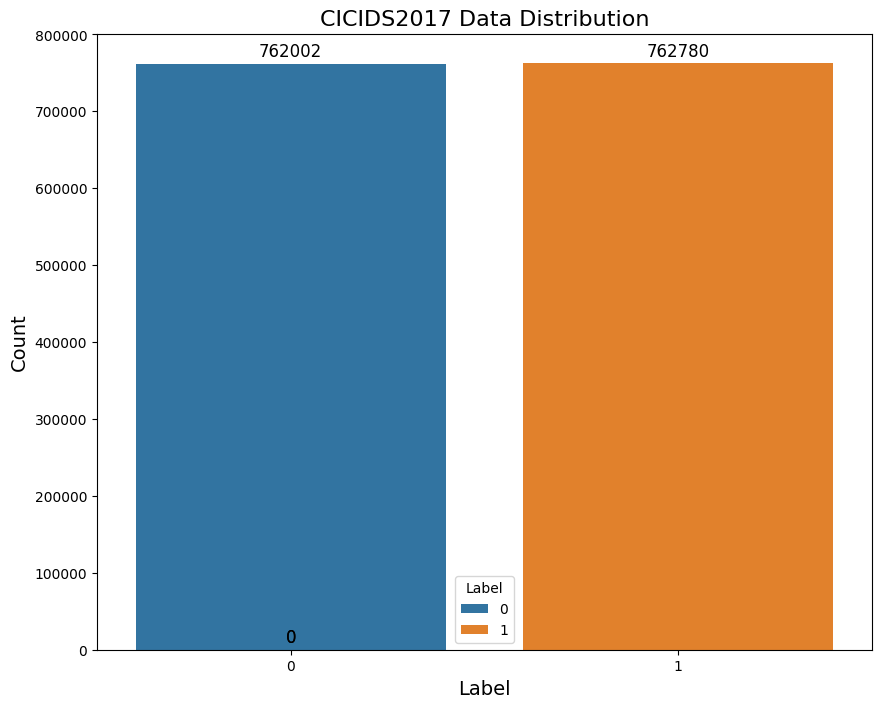

In [22]:
# Plot the distribution
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=combined_df, x='Label', hue='Label')

# Add numbers on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set plot title and labels
plt.title('Balanced CICIDS2017 Data Distribution', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Save the figure as a high-resolution image
plt.savefig("balanced training.png", dpi=300)

# Show the plot
plt.show()

In [ ]:
# Set plot title and labels
plt.title('Balanced CICIDS2017 Data Distribution', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Count', fontsize=14)

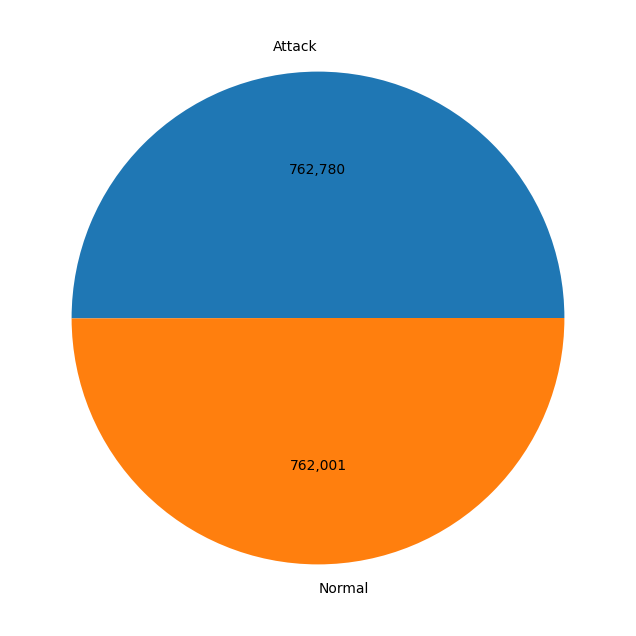

In [36]:
# Define the labels
labels = ['Attack','Normal']
# Set up the figure size
plt.figure(figsize=(8,8))
# Plot the pie chart with actual counts
combined_df['Label'].value_counts().plot.pie(
    labels=labels,
    explode=[0, 0],  # No space between slices
    autopct=lambda p: f'{int(p * combined_df["Label"].value_counts().sum() / 100):,}',  # Display actual counts
)
#plt.title('Balanced CICIDS2017', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
# Save the figure as a high-resolution image
plt.savefig("balanced training.png", dpi=300)

# Show the plot
plt.show()


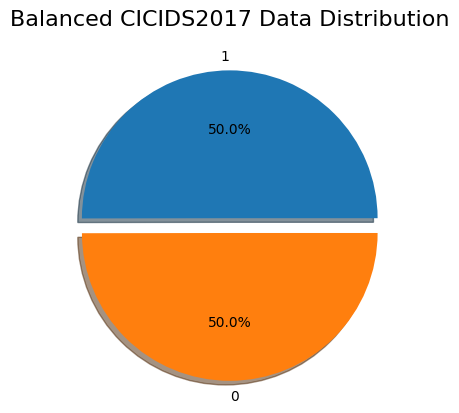

In [29]:

combined_df['Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Balanced CICIDS2017 Data Distribution', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('', fontsize=14)
plt.show()

In [ ]:
#the end